In [79]:
# Importing all the necessary libraries that would be used below

# Allows charts to appear in the notebook
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn import metrics

In [33]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:

df = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/dog_shelter_outcomes.csv')
test_df = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/test.csv')
print (df.head())
print (test_df.head())

  AnimalID     Name          DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  12-02-2014 18:22  Return_to_owner            NaN   
1  A656520    Emily  13-10-2013 12:44       Euthanasia      Suffering   
2  A686464   Pearce  31-01-2015 12:28         Adoption         Foster   
3  A683430      NaN  11-07-2014 19:09         Transfer        Partner   
4  A667013      NaN  15-11-2013 12:52         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White  
3   Blue Cream  
4          Tan  
   ID   

## Checking the distribution of the animal types, namely CATs & DOGs in the data set.
### It looks like the number of dogs is more compared to number of cats.

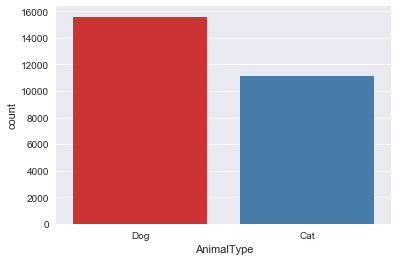

In [34]:
# See the distribution of animal type
sns.countplot(df.AnimalType, palette='Set1')

## Plotting based on the OutcomeType
### Adopting and Transferring has been popular among the shelter animals  

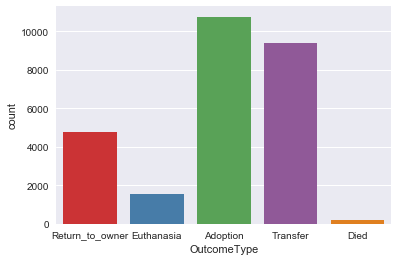

In [35]:
# See the distribution of outcome
sns.countplot(df.OutcomeType,palette='Set1')

# Plotting between AnimalType and the OutcomeType
### We could see different scenarios for dogs and cats. Most of the cats were either transferred or Adopted.
### whereas most of the dogs got adopted, few were returned to the owner and fewer got transferred.

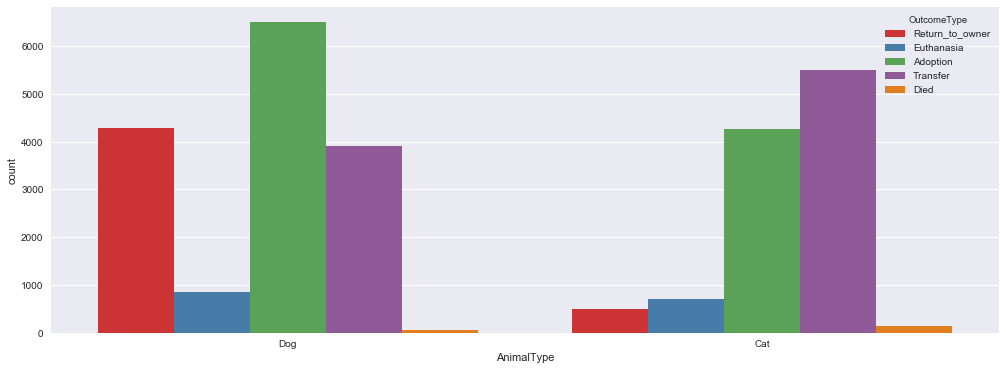

In [36]:
plt.figure(figsize=(17,6))
sns.countplot(df.AnimalType,hue=df.OutcomeType,palette='Set1')

### Most of the animals in the shelter are either spayed female or neutered male

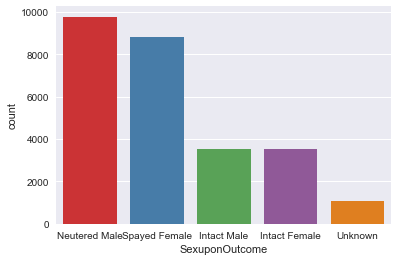

In [37]:
sns.countplot(df.SexuponOutcome, palette='Set1')

## Looking at the parameters that might influence the outcome

In [38]:
# Creating a new column for gender
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'

df['Sex'] = df.SexuponOutcome.apply(get_sex)

### Male and Females were equally adopted and transferred.
### Similarly the number of males returned to the owner  were more than females. 

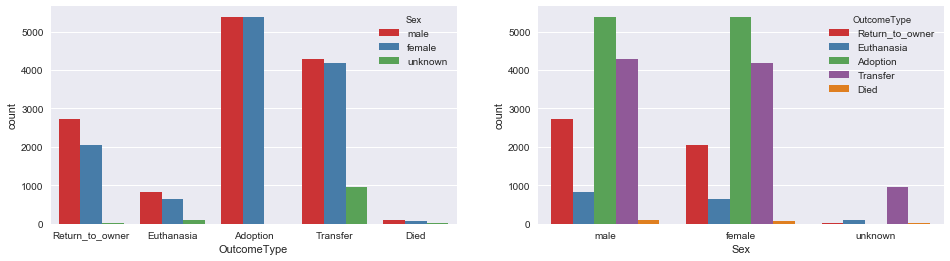

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='OutcomeType',hue='Sex', ax=ax1, palette='Set1')
sns.countplot(data=df, x='Sex',hue='OutcomeType', ax=ax2, palette='Set1')

### Dogs tend to be returned to owner more often than cats. And cats are transferred more often than dogs.

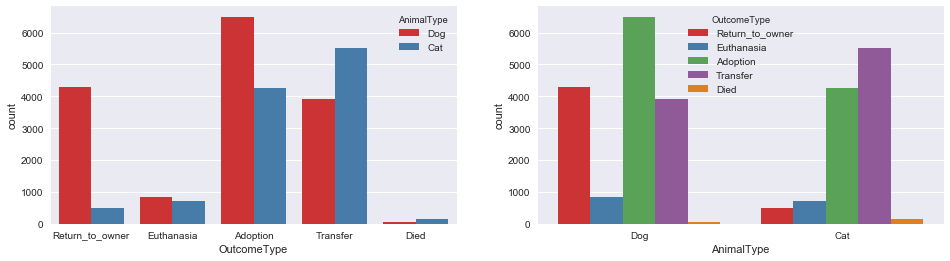

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='OutcomeType',hue='AnimalType', ax=ax1, palette='Set1')
sns.countplot(data=df, x='AnimalType',hue='OutcomeType', ax=ax2, palette='Set1')

In [42]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

In [43]:
df['AgeInYears'] = df.AgeuponOutcome.apply(calc_age_in_years)

In [44]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'

df['AgeCategory'] = df.AgeInYears.apply(calc_age_category)

### Young cats and dogs have much higher chances to be adopted or transferred than to be returned to owner or  something else, while older animals with approximately equal probability can be adopted, transferred or returned

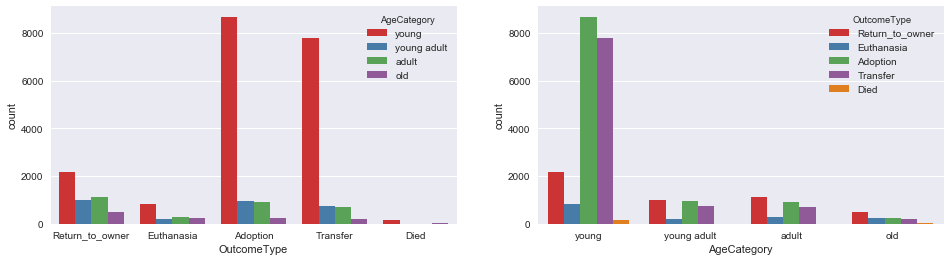

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='OutcomeType',hue='AgeCategory', ax=ax1,palette='Set1')
sns.countplot(data=df, x='AgeCategory',hue='OutcomeType', ax=ax2,palette='Set1')

## Normalizing the columns in a dataset is a must for uniformity, hence the we converted the AgeuponOutcome to a common unit, i.e; weeks.

In [46]:
# convert all of the AgeuponOutcome values into weeks

def convert_AgeuponOutcome_to_weeks(df):
    result = {}
    for k in df['AgeuponOutcome'].unique():
        if type(k) != type(""):
            result[k] = -1
        else:
            v1, v2 = k.split()
            if v2 in ["year", "years"]:
                result[k] = int(v1) * 52
            elif v2 in ["month", "months"]:
                result[k] = int(v1) * 4.5
            elif v2 in ["week", "weeks"]:
                result[k] = int(v1)
            elif v2 in ["day", "days"]:
                result[k] = int(v1) / 7
                
    df['_AgeuponOutcome'] = df['AgeuponOutcome'].map(result).astype(float)
    df = df.drop('AgeuponOutcome', axis = 1)
                
    return df

df = convert_AgeuponOutcome_to_weeks(df)
test_df = convert_AgeuponOutcome_to_weeks(test_df)

print (df.head())

  AnimalID     Name          DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  12-02-2014 18:22  Return_to_owner            NaN   
1  A656520    Emily  13-10-2013 12:44       Euthanasia      Suffering   
2  A686464   Pearce  31-01-2015 12:28         Adoption         Foster   
3  A683430      NaN  11-07-2014 19:09         Transfer        Partner   
4  A667013      NaN  15-11-2013 12:52         Transfer        Partner   

  AnimalType SexuponOutcome                        Breed        Color     Sex  \
0        Dog  Neutered Male        Shetland Sheepdog Mix  Brown/White    male   
1        Cat  Spayed Female       Domestic Shorthair Mix  Cream Tabby  female   
2        Dog  Neutered Male                 Pit Bull Mix   Blue/White    male   
3        Cat    Intact Male       Domestic Shorthair Mix   Blue Cream    male   
4        Dog  Neutered Male  Lhasa Apso/Miniature Poodle          Tan    male   

   AgeInYears AgeCategory  _AgeuponOutcome  
0    1.000000       young    

## Converting the rest of the categorical data to numeric type for easier classifications

In [47]:
# convert all of the remaining features to numeric values

def convert_to_numeric(df):
    for col in ['AnimalType','SexuponOutcome','Breed']:
        if col in df.columns:
            _col = "_%s" % (col)
            values = df[col].unique()
            _values = dict(zip(values, range(len(values))))
            df[_col] = df[col].map(_values).astype(int)
            df = df.drop(col, axis = 1)
    return df

df = convert_to_numeric(df)
test_df = convert_to_numeric(test_df)

print (df.head())

  AnimalID     Name          DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  12-02-2014 18:22  Return_to_owner            NaN   
1  A656520    Emily  13-10-2013 12:44       Euthanasia      Suffering   
2  A686464   Pearce  31-01-2015 12:28         Adoption         Foster   
3  A683430      NaN  11-07-2014 19:09         Transfer        Partner   
4  A667013      NaN  15-11-2013 12:52         Transfer        Partner   

         Color     Sex  AgeInYears AgeCategory  _AgeuponOutcome  _AnimalType  \
0  Brown/White    male    1.000000       young             52.0            0   
1  Cream Tabby  female    1.000000       young             52.0            1   
2   Blue/White    male    2.000000       young            104.0            0   
3   Blue Cream    male    0.057692       young              3.0            1   
4          Tan    male    2.000000       young            104.0            0   

   _SexuponOutcome  _Breed  
0                0       0  
1                1    

In [48]:
# fix the DateTime column

def fix_date_time(df):
    def extract_field(_df, start, stop):
        return _df['DateTime'].map(lambda dt: int(dt[start:stop]))
    df['Day'] = extract_field(df,0,2)
    df['Month'] = extract_field(df,3,5)
    df['Year'] = extract_field(df,6,10)
    df['Hour'] = extract_field(df,11,13)
    df['Minute'] = extract_field(df,14,16)
    
    return df.drop(['DateTime'], axis = 1)

df = fix_date_time(df)
test_df = fix_date_time(test_df)

print (df.head())

  AnimalID     Name      OutcomeType OutcomeSubtype        Color     Sex  \
0  A671945  Hambone  Return_to_owner            NaN  Brown/White    male   
1  A656520    Emily       Euthanasia      Suffering  Cream Tabby  female   
2  A686464   Pearce         Adoption         Foster   Blue/White    male   
3  A683430      NaN         Transfer        Partner   Blue Cream    male   
4  A667013      NaN         Transfer        Partner          Tan    male   

   AgeInYears AgeCategory  _AgeuponOutcome  _AnimalType  _SexuponOutcome  \
0    1.000000       young             52.0            0                0   
1    1.000000       young             52.0            1                1   
2    2.000000       young            104.0            0                0   
3    0.057692       young              3.0            1                2   
4    2.000000       young            104.0            0                0   

   _Breed  Day  Month  Year  Hour  Minute  
0       0   12      2  2014    18      22 

In [49]:
# Creating feature matrix
feature_cols = ['_AnimalType','_SexuponOutcome', '_AgeuponOutcome','_Breed','Day','Month','Year','Hour','Minute']

# use the above list to select the features from the original DataFrame
X = df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = df['OutcomeType']

print(X.shape)
print(y.shape)

(26729, 9)
(26729,)


# Evaluating the accuracy of our classifier:

#### 1- Let's split the iris dataset RANDOMLY into two new datasets: Training Set (e.g. 70% of the dataset) and Testing Set (30% of the dataset).
#### 2- Let's pretend that we do NOT know the label of the Testing Set!
#### 3- Let's Train the model on only Training Set, and then Predict on the Testing Set!
#### 4- After prediction, we can compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy of our Classifier!

In [50]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.2" means that pick 20% of data samples for testing set, and the rest (80%) for training set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
k = 17
my_knn = KNeighborsClassifier(n_neighbors=k)

my_knn.fit(X_train, y_train)

y_predict_knn = my_knn.predict(X_test)

In [52]:
# "my_RandomForest" is instantiated as an "object" of RandomForestClassifier "class". 
my_RandomForest = RandomForestClassifier(n_estimators = 250, bootstrap = True, random_state=2)

# for training:  

my_RandomForest.fit(X_train,y_train) 

# for testing/prediction:  

y_predict_rf = my_RandomForest.predict(X_test)

In [53]:
# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 

my_decisiontree = DecisionTreeClassifier()

# We can use the method "fit" of the objects "my_decisiontree" along with training dataset and labels to train the model.

my_decisiontree.fit(X_train, y_train)

# Testing on the testing set:

y_predict_dt = my_decisiontree.predict(X_test)

In [66]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)

In [67]:
# "sgd" is instantiated as an "object" of SGD "class".
my_sgd = SGDClassifier()

my_sgd.fit(X_train, y_train)

y_predict_sgd = my_sgd.predict(X_test)

In [77]:
my_et = ExtraTreeClassifier()

my_et.fit(X_train, y_train)

y_predict_et = my_et.predict(X_test)

In [93]:
my_ets = ExtraTreesClassifier(n_estimators=175)

my_ets.fit(X_train, y_train)

y_predict_ets = my_ets.predict(X_test)

In [55]:
# "gnb" is instantiated as an "object" of Gaussian Naive Bayes "class".
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_predict_gb = gnb.predict(X_test)

In [94]:
# Predicting accuracy for KNN
knn_accuracy = accuracy_score(y_test, y_predict_knn)

# Predicting accuracy for DecisiontTree
dt_accuracy = accuracy_score(y_test, y_predict_dt)

# Predicting accuracy for RandomForest
rf_accuracy = accuracy_score(y_test, y_predict_rf)

# Predicting accuracy for LogisticRegression
lr_accuracy = accuracy_score(y_test, y_predict_lr)

# Predicting accuracy for GaussianNB
gb_accuracy = accuracy_score(y_test, y_predict_gb)

# Predicting accuracy for SGD
sgd_accuracy = accuracy_score(y_test, y_predict_sgd)

# Predicting accuracy for Extra Tree
et_accuracy = accuracy_score(y_test, y_predict_et)

# Predicting accuracy for Extra Trees
ets_accuracy = accuracy_score(y_test, y_predict_ets)

print('SGD CLASSIFIER ACCURACY:',sgd_accuracy)
print('KNN ACCURACY:',dt_accuracy)
print('DECISION TREE ACCURACY:',dt_accuracy)
print('EXTRA TREE ACCURACY:',et_accuracy)
print('EXTRA TREES ACCURACY:',ets_accuracy)
print('GAUSSIAN NAIVE BAYES ACCURACY:',gb_accuracy)
print('LOGISTIC REGRESSION ACCURACY:',lr_accuracy)
print('RANDOM FOREST ACCURACY:',rf_accuracy)

SGD CLASSIFIER ACCURACY: 0.415824915825
KNN ACCURACY: 0.594837261504
DECISION TREE ACCURACY: 0.594837261504
EXTRA TREE ACCURACY: 0.564347175458
EXTRA TREES ACCURACY: 0.678638234194
GAUSSIAN NAIVE BAYES ACCURACY: 0.618780396558
LOGISTIC REGRESSION ACCURACY: 0.627946127946
RANDOM FOREST ACCURACY: 0.685185185185
